In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from astropy.io import fits, ascii
import os
import math
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']

In [32]:
pub = pd.read_csv('raw_data_files/mann_published.csv')
unpub = ascii.read('raw_data_files/mann_unpublished.txt')

p1 = ['published' for i in list(pub['RAdeg'])]
p2 = ['unpublished' for i in np.array(unpub['Ra'])]
print(pub.keys())
print(unpub.keys())

Index(['BPmag', 'Bmag', 'CNS3', 'DEdeg', 'Fbol', 'Gaiamag', 'Hmag', 'Icmag',
       'Jmag', 'Ksmag', 'M', 'ModAge', 'ModFbol', 'ModM', 'ModR', 'ModTeff',
       'Name', 'R', 'RAdeg', 'RPmag', 'Rcmag', 'SpType', 'Teff', 'Vmag',
       '[Fe/H]', 'chisq', 'e_BPmag', 'e_Bmag', 'e_Fbol', 'e_Gaiamag', 'e_Hmag',
       'e_Icmag', 'e_Jmag', 'e_Ksmag', 'e_M', 'e_ModAge', 'e_ModFbol',
       'e_ModM', 'e_ModR', 'e_ModTeff', 'e_R', 'e_RPmag', 'e_Rcmag', 'e_Teff',
       'e_Vmag', 'e_[Fe/H]', 'e_gmag', 'e_imag', 'e_rmag', 'e_zmag', 'gmag',
       'imag', 'rmag', 'zmag'],
      dtype='object')
['Name', 'Ra', 'Dec', 'Teff', '[Fe/H]']


In [33]:
ra = np.concatenate((np.array(pub['RAdeg']), np.array(unpub['Ra'])), axis=0)
dec = np.concatenate((np.array(pub['DEdeg']), np.array(unpub['Dec'])), axis=0)
teff = np.concatenate((np.array(pub['Teff']), np.array(unpub['Teff'])), axis=0)
fe_h = np.concatenate((np.array(pub['[Fe/H]']), np.array(unpub['[Fe/H]'])), axis=0)
source = np.concatenate((p1, p2), axis=0)

In [36]:
ddict = {'RA':ra, 'DEC':dec, 'TEFF':teff, 'FE_H':fe_h, 'SOURCE':source}
df = pd.DataFrame(data=ddict)
df.to_csv('raw_data_files/mann_combined.csv')

In [45]:
xmatch = pd.read_csv('raw_data_files/mann_combined_x_APOGEE.csv')
# np.array(xmatch.keys())
ID = xmatch['APOGEE_ID']
ra = xmatch['RA_1']
dec = xmatch['DEC_1']
teff = xmatch['TEFF_1']
fe_h = xmatch['FE_H_1']
source = xmatch['SOURCE']

ddict = {'ID':ID, 'RA':ra, 'DEC':dec, 'TEFF':teff, 'FE_H':fe_h, 'SOURCE':source}
df = pd.DataFrame(data=ddict)
df.to_csv('raw_data_files/mann_combined.csv')

In [55]:
rfile = 'train_ref/mann_combined_ref_labels_93.csv'  
train = pd.read_csv(rfile)
for ID in train['ID']:
    ap.download(ID, dir=AP_PATH + '/training_sets/mann_sample_93/')

['2M00182256+4401222'] [1]
2M00182256+4401222 not found in APOGEE 2.5m survey.
aspcapStar-r8-l31c.2-2M00182256+4401222.fits successfully downloaded. 

['2M00182549+4401376'] [1]
2M00182549+4401376 not found in APOGEE 2.5m survey.
aspcapStar-r8-l31c.2-2M00182549+4401376.fits successfully downloaded. 

['2M02001278+1303112'] [1]
2M02001278+1303112 not found in APOGEE 2.5m survey.
aspcapStar-r8-l31c.2-2M02001278+1303112.fits successfully downloaded. 

['2M02361535+0652191'] [1]
2M02361535+0652191 not found in APOGEE 2.5m survey.
aspcapStar-r8-l31c.2-2M02361535+0652191.fits successfully downloaded. 

['2M03044335+6144097'] [4551]
aspcapStar-r8-l31c.2-2M03044335+6144097.fits successfully downloaded. 

['2M03553688+5214291'] [4151]
aspcapStar-r8-l31c.2-2M03553688+5214291.fits successfully downloaded. 

['2M05312734-0340356'] [1]
2M05312734-0340356 not found in APOGEE 2.5m survey.
aspcapStar-r8-l31c.2-2M05312734-0340356.fits successfully downloaded. 

['2M05413073+5329239'] [1]
2M05413073+532

In [78]:
xmatch = pd.read_csv('raw_data_files/west_x_APOGEE.csv')

ID = xmatch['APOGEE_ID']
ra = xmatch['RAJ2000']
dec = xmatch['DEJ2000']
spt = xmatch['SpT']
halpha = xmatch['W_Ha_']
snr = xmatch['SNR']

ddict = {'ID':ID, 'RA':ra, 'DEC':dec, 'SPT':spt, 'H_ALPHA':halpha, 'SNR':snr}
df = pd.DataFrame(data=ddict)
df.to_csv('train_ref/west_ref_labels_98.csv')

In [75]:
for name in ID:
    ap.download(name, dir=AP_PATH + '/training_sets/west_sample_98/')

['2M12471599+2817425'] [4127]
aspcapStar-r8-l31c.2-2M12471599+2817425.fits successfully downloaded. 

['2M13452385+1844222'] [4481]
aspcapStar-r8-l31c.2-2M13452385+1844222.fits successfully downloaded. 

['2M15424779+4534214'] [2366]
aspcapStar-r8-l31c.2-2M15424779+4534214.fits successfully downloaded. 

['2M14592059+3219293'] [4220]
aspcapStar-r8-l31c.2-2M14592059+3219293.fits successfully downloaded. 

['2M16113384+2429072'] [5125]
aspcapStar-r8-l31c.2-2M16113384+2429072.fits successfully downloaded. 

['2M14030704+5403356'] [4499]
aspcapStar-r8-l31c.2-2M14030704+5403356.fits successfully downloaded. 

['2M13442970+5625445'] [4500]
aspcapStar-r8-l31c.2-2M13442970+5625445.fits successfully downloaded. 

['2M12252076+2517082'] [4216]
aspcapStar-r8-l31c.2-2M12252076+2517082.fits successfully downloaded. 

['2M13282079+3859398'] [4484]
aspcapStar-r8-l31c.2-2M13282079+3859398.fits successfully downloaded. 

['2M15591175+0637577'] [5131]
aspcapStar-r8-l31c.2-2M15591175+0637577.fits success

In [76]:
dl = ['2M03114974+0115158','2M03122509+0021585','2M03153109+3955161','2M03423963+0012102','2M03440466+0049332','2M04254701+1732407','2M04262170+1800009','2M06030979+2233260','2M07230160+4055426','2M08043605+5330565','2M08460531+1035309','2M08494430+1135327','2M09013404+0326287','2M09152918+4407461','2M09183649+2207022','2M09332262+2749021','2M09373349+5534057','2M10222276+1353383','2M10313413+3441535','2M10545293+4402506','2M11010030+2035056','2M11194647+0820356','2M11203609+0704135','2M11215827+0646252','2M11570299+2028436','2M12052751+1811555','2M12080810+3520281','2M12102152+4026185','2M12115216+3525458','2M12132318+3900529','2M12202436+2508225','2M12203634+2505351','2M12212701-0030560','2M12252076+2517082','2M12264289+0009059','2M12294016+2619567','2M12423245-0646077','2M12464541-0312524','2M12471099+1109566','2M12471599+2817425','2M12492657-0312032','2M12503440+4309482','2M12523816+1240586','2M12552141+4150425','2M12564117+4233175','2M13032161+4220407','2M13282079+3859398','2M13415860+1852278','2M13442970+5625445','2M13452385+1844222','2M13542316+2543152','2M13565847+3200294','2M14003808+3217085','2M14005977+3226109','2M14030704+5403356','2M14055603+0140310','2M14102952+4349477','2M14213414+0451188','2M14275590+5817281','2M14290377+4917403','2M14350795+4954080','2M14402293+1339230','2M14575608+2140337','2M14592059+3219293','2M15004819+2050499','2M15010818+2250020','2M15034431+2730327','2M15064250+3246099','2M15141711+0044474','2M15195523+0254040','2M15232142+3453119','2M15424779+4534214','2M15575183+0657068','2M15591175+0637577','2M16022228+0616424','2M16055380+2303058','2M16084282+2327406','2M16101653+4511112','2M16103232+2249116','2M16112965+2403267','2M16113384+2429072','2M16114429+2253294','2M16282719-0050428','2M16351077-0102156','2M16355440+3716239','2M16363188+3655364','2M16383117+3746233','2M16393137+3722527','2M16393824+3550337','2M16410962+3535407','2M16485665+3639205','2M17223434+5946359','2M19203934+3748048','2M19210112+3742134','2M23295172+4825211']

In [77]:
set(ID) - set(dl)

{'2M17031418+5910480', '2M21342546+0021006', '2M21354275-0113120'}

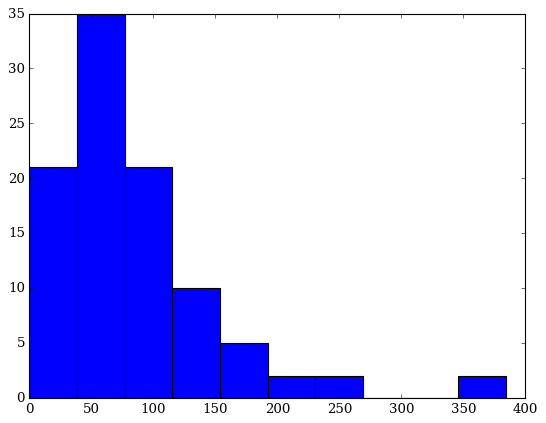

In [80]:
plt.hist(snr)
plt.show()

In [86]:
blake = pd.read_csv('raw_data_files/dinos_blake_x_simbad.csv')

In [88]:
np.array(blake.keys())

array(['APSTAR_ID', 'TARGET_ID', 'ASPCAP_ID', 'FILE', 'APOGEE_ID',
       'TELESCOPE', 'LOCATION_ID', 'FIELD', 'J', 'J_ERR', 'H', 'H_ERR',
       'K', 'K_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'APOGEE_TARGET1',
       'APOGEE_TARGET2', 'APOGEE_TARGET3', 'TARGFLAGS', 'SURVEY',
       'NVISITS', 'COMBTYPE', 'COMMISS', 'SNR', 'STARFLAG', 'STARFLAGS',
       'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR',
       'VERR_MED', 'OBSVHELIO_AVG', 'OBSVSCATTER', 'OBSVERR',
       'OBSVERR_MED', 'SYNTHVHELIO_AVG', 'SYNTHVSCATTER', 'SYNTHVERR',
       'SYNTHVERR_MED', 'RV_TEFF', 'RV_LOGG', 'RV_FEH', 'RV_ALPHA',
       'RV_CARB', 'DESIGNATION', 'ALLWISE_angDist', 'ALLWISE_AllWISE',
       'ALLWISE_RAJ2000', 'ALLWISE_DEJ2000', 'ALLWISE_W1mag',
       'ALLWISE_e_W1mag', 'ALLWISE_W2mag', 'ALLWISE_e_W2mag',
       'ALLWISE_W3mag', 'ALLWISE_e_W3mag', 'ALLWISE_W4mag',
       'ALLWISE_e_W4mag', 'ALLWISE_pmRA', 'ALLWISE_e_pmRA',
       'ALLWISE_pmDE', 'ALLWISE_e_pmDE', 'ALLWISE_ID', '2MASS_angDist',
  

In [96]:
np.where(np.array(blake['SIMBAD_sp_type']).lower() != 'nan')

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [132]:
spt = np.array(blake['SIMBAD_sp_type'])
yspt = []
for i in range(len(spt)):
    if (type(spt[i]) == str):
        if ('f' not in spt[i].lower()) and ('g' not in spt[i].lower()) and ('k' not in spt[i].lower()):
            yspt.append(i)
    elif (math.isnan(spt[i]) == False):
        yspt.append(i)
yspt = np.array(yspt)

In [133]:
spt[yspt]

array(['M1.0Ve', 'M3.5Ve', 'M2.5Ve', 'M:', 'M0.0Ve', 'M4', 'M3.7V',
       'M4.5V', 'M:', 'M4.3V', 'M0.5Ve', 'M3.0V', 'M3.0Ve', 'L1.3::V',
       'M:', 'M5', 'M', 'M:', 'M4.15', 'M4Ve', 'M:', 'M4.0V', 'M3', 'M3',
       'M2.5V', 'M7V', 'M1.0', 'M3.5V', 'M4.0V', 'M3.5', 'M2.0Ve', 'M3.5',
       'M3.5V', 'M4.0V', 'M:', 'M3V', 'M2.5V', 'M1.0Ve', 'M2', 'M3.77',
       'M4.5', 'M4.0Ve', 'M3.0V', 'M2.5V', 'M3.5', 'M3.5', 'M1.5',
       'M0.0Ve', 'M1.0Ve', 'M5V', 'M5.0V', 'M3.5', 'M5', 'M3.5V', 'M3',
       'M2.5', 'M8', 'M7V', 'M4.5V', 'M3.5', 'M4.0V', 'M4', 'M5.0V', 'M:',
       'M2.5', 'M1.5', 'M1.5', 'M3.5', 'dM0.5', 'dM4.5+', 'L1.0V',
       'M4.0V', 'M1.0Ve', 'M1.5Ve', 'M2.0Ve', 'M1.5V', 'M4V', 'M3.5',
       'M4', 'M3V', 'M3.5V', 'M9.2V', 'M3.5', 'M2.5V', 'M8', 'M3.5V',
       'M4.5', 'M3.0V', 'M:', 'M2.5', 'M4.0V', 'M4.0', 'M3.5', 'M3.5Ve',
       'M4V', 'M4V', 'M4V', 'M3.5', 'M1.5Ve', 'M1.5Ve', 'M1.5Ve', 'M3.72',
       'M3.72', 'M2.5V', 'M0V', 'M2.5V', 'M5V', 'M1.0Ve', 'M1V', 'M7',


In [135]:
west = pd.read_csv('train_ref/west_ref_labels_96.csv'  )